# Pokemon Exploratory Data Analysis

This notebook walks you through a typical EDA exercise.

We will conduct a rigorous data analysis on 8 generations of Pokemon stats. It will cover

- Descriptive Statistics
- Missing Values
- Univariate Analysis
- Multivariate Analysis
- Outlier Analysis

----

# Section 0 - Preamble

We will import all the relevant packages here:

- `pandas`
- `matplotlib`
- `seaborn`

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

Since Pokemon have a colour scheme according to type, let's use it

In [2]:
color_dict={'normal': '#A8A77A',
 'fire': '#EE8130',
 'water': '#6390F0',
 'electric': '#F7D02C',
 'grass': '#7AC74C',
 'ice': '#96D9D6',
 'fighting': '#C22E28',
 'poison': '#A33EA1',
 'ground': '#E2BF65',
 'flying': '#A98FF3',
 'psychic': '#F95587',
 'bug': '#A6B91A',
 'rock': '#B6A136',
 'ghost': '#735797',
 'dragon': '#6F35FC',
 'dark': '#705746',
 'steel': '#B7B7CE',
 'fairy': '#D685AD'}

We specify the folder to which we will save the plots we wish.

We then load the dataset into memory, and its off to the races!

In [3]:
plot_folder='plots'
file_path = 'pokemon/pokemon.csv'
df = pd.read_csv(file_path)
df.tail(10)

abilities  against_bug  against_dark  against_dragon  \
791  ['Shadow Shield']         1.00           4.0             1.0   
792    ['Beast Boost']         0.50           1.0             1.0   
793    ['Beast Boost']         0.50           0.5             1.0   
794    ['Beast Boost']         0.50           0.5             1.0   
795    ['Beast Boost']         1.00           1.0             1.0   
796    ['Beast Boost']         0.25           1.0             0.5   
797    ['Beast Boost']         1.00           1.0             0.5   
798    ['Beast Boost']         2.00           0.5             2.0   
799    ['Prism Armor']         2.00           2.0             1.0   
800     ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight  against_fire  \
791               1.0            1.0            0.0           1.0   
792               1.0            0.5            1.0           0.5   
793               1.0            2.0            0.5           2.0   
794               1.0            2.0            0.5           2.0   
795               0.5            1.0            1.0           1.0   
796               2.0            0.5            1.0           2.0   
797               0.5            0.5            2.0           4.0   
798               0.5            4.0            2.0           0.5   
799               1.0            1.0            0.5           1.0   
800               1.0            0.5            1.0           2.0   

     against_flying  against_ghost  ...  percentage_male  pokedex_number  \
791             1.0            4.0  ...              NaN             792   
792             0.5            1.0  ...              NaN             793   
793             4.0            1.0  ...              NaN             794   
794             4.0            1.0  ...              NaN             795   
795             0.5            1.0  ...              NaN             796   
796             0.5            1.0  ...              NaN             797   
797             1.0            1.0  ...              NaN             798   
798             1.0            0.5  ...              NaN             799   
799             1.0            2.0  ...              NaN             800   
800             0.5            1.0  ...              NaN             801   

     sp_attack  sp_defense  speed     type1     type2  weight_kg  generation  \
791        137         107     97   psychic     ghost      120.0           7   
792        127         131    103      rock    poison       55.5           7   
793         53          53     79       bug  fighting      333.6           7   
794        137          37    151       bug  fighting       25.0           7   
795        173          71     83  electric       NaN      100.0           7   
796        107         101     61     steel    flying      999.9           7   
797         59          31    109     grass     steel        0.1           7   
798         97          53     43      dark    dragon      888.0           7   
799        127          89     79   psychic       NaN      230.0           7   
800        130         115     65     steel     fairy       80.5           7   

     is_legendary  
791             1  
792             1  
793             1  
794             1  
795             1  
796             1  
797             1  
798             1  
799             1  
800             1  

[10 rows x 41 columns]

# Section 1 - Basic Exploration

First, we get a sense of the composition of data. `.info()` is your friend here.

It is good to read the [DataFrame.info() docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html). This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. Pass `verbose=True` for more information.

You should take away the following when you read the output of `.info()`:

- Are there any columns with wildly different non-null counts? This indicates missing data. We should not discard columns just because they are not tidy, but there are additional procedures to [dealing with missing data](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/) (MCAR, MAR, MNAR warrant different treatment.)
- Are there any columns where a data type does not seem quite right? If you expect numerical values but they turn out to be of type `object`, this means some rows in the column could be text where they actually should be numbers.
- Is my dataset taking up a lot of memory? Larger datasets would probably be better put into a SQL table and analyzed using that as SQL is more powerful when it comes to structured data.

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

From the above, we can make the following observations:

- `capture_rate` looks odd... It sounds like a numerical field but is actually an object. Could there be something wrong with the way data is stored?
- `height_m` and `weight_kg` have the same number of non-null values, but are mostly populated (781 non-null values vs total dataset size of 801 entries). We should think of how to handle these missing values.
- `type2` has only 417 non-null entries, meaning it has many missing values. We need to handle them.

## 1.1 Missing Values

First, lets take a look at both `height_m` and `weight_kg` and the Pokemon that have null values. We find that the with missing values are Pokemon which have Alolan variants, and thus have different height and weight from the other regions' variants.

Finding a dataset with both the Alolan and Normal variants is outside the scope of this notebook. Hence, we will do a naive fill in with the median, and then add a new binary variable called '`has_alolan_variant`'.

In [5]:
df.query('height_m.isnull()')['name']

18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object

Next, there are Pokemon which are genderless such as Magnemite and Voltorb. Hence, it might be worthwhile to create a new binary variable called '`Genderless`' to better describe the data. We fill missing values with 0.

In [6]:
df.query('percentage_male.isnull()')['name']

80      Magnemite
81       Magneton
99        Voltorb
100     Electrode
119        Staryu
          ...    
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, Length: 98, dtype: object

Finally, `type2` has a lot of missing values, which makes sense because there are many Pokemon with only one type. We fill in missing values with a simple "`None`" value

In [7]:
df.query('type2.isnull()')['name']

3      Charmander
4      Charmeleon
6        Squirtle
7       Wartortle
8       Blastoise
          ...    
781      Jangmo-o
788        Cosmog
789       Cosmoem
795     Xurkitree
799      Necrozma
Name: name, Length: 384, dtype: object

In [8]:
df['has_alolan_variant']=df['height_m'].isna().map(lambda x: 1 if x else 0)
df['height_m'].fillna(df['height_m'].median(),inplace=True)
df['weight_kg'].fillna(df['weight_kg'].median(),inplace=True)
df['type2'].fillna('None',inplace=True)
df['percentage_male'].fillna(0,inplace=True)
df['is_genderless']=df['percentage_male'].map(lambda x: 1 if x else 0)

In [9]:
df.T

0                            1    \
abilities           ['Overgrow', 'Chlorophyll']  ['Overgrow', 'Chlorophyll']   
against_bug                                 1.0                          1.0   
against_dark                                1.0                          1.0   
against_dragon                              1.0                          1.0   
against_electric                            0.5                          0.5   
against_fairy                               0.5                          0.5   
against_fight                               0.5                          0.5   
against_fire                                2.0                          2.0   
against_flying                              2.0                          2.0   
against_ghost                               1.0                          1.0   
against_grass                              0.25                         0.25   
against_ground                              1.0                          1.0   
against_ice                                 2.0                          2.0   
against_normal                              1.0                          1.0   
against_poison                              1.0                          1.0   
against_psychic                             2.0                          2.0   
against_rock                                1.0                          1.0   
against_steel                               1.0                          1.0   
against_water                               0.5                          0.5   
attack                                       49                           62   
base_egg_steps                             5120                         5120   
base_happiness                               70                           70   
base_total                                  318                          405   
capture_rate                                 45                           45   
classfication                      Seed Pokémon                 Seed Pokémon   
defense                                      49                           63   
experience_growth                       1059860                      1059860   
height_m                                    0.7                          1.0   
hp                                           45                           60   
japanese_name                  Fushigidaneフシギダネ              Fushigisouフシギソウ   
name                                  Bulbasaur                      Ivysaur   
percentage_male                            88.1                         88.1   
pokedex_number                                1                            2   
sp_attack                                    65                           80   
sp_defense                                   65                           80   
speed                                        45                           60   
type1                                     grass                        grass   
type2                                    poison                       poison   
weight_kg                                   6.9                         13.0   
generation                                    1                            1   
is_legendary                                  0                            0   
has_alolan_variant                            0                            0   
is_genderless                                 1                            1   

                                            2                         3    \
abilities           ['Overgrow', 'Chlorophyll']  ['Blaze', 'Solar Power']   
against_bug                                 1.0                       0.5   
against_dark                                1.0                       1.0   
against_dragon                              1.0                       1.0   
against_electric                            0.5                       1.0   
against_fairy                               0.5              

---

# Section 2 - Univariate Analysis

In univariate analysis, there is only **one** dependent variable. The objective is to define, summarize, and analyze the patterns present in it.

We can generate the usual statistical measures easily with `DataFrame.describe()`:

In [10]:
describe = df.describe().T
describe

count          mean            std        min        25%  \
against_bug         801.0  9.962547e-01       0.597248       0.25        0.5   
against_dark        801.0  1.057116e+00       0.438142       0.25        1.0   
against_dragon      801.0  9.687890e-01       0.353058       0.00        1.0   
against_electric    801.0  1.073970e+00       0.654962       0.00        0.5   
against_fairy       801.0  1.068976e+00       0.522167       0.25        1.0   
against_fight       801.0  1.065543e+00       0.717251       0.00        0.5   
against_fire        801.0  1.135456e+00       0.691853       0.25        0.5   
against_flying      801.0  1.192884e+00       0.604488       0.25        1.0   
against_ghost       801.0  9.850187e-01       0.558256       0.00        1.0   
against_grass       801.0  1.034020e+00       0.788896       0.25        0.5   
against_ground      801.0  1.098002e+00       0.738818       0.00        1.0   
against_ice         801.0  1.208177e+00       0.735356       0.25        0.5   
against_normal      801.0  8.870162e-01       0.266106       0.00        1.0   
against_poison      801.0  9.753433e-01       0.549375       0.00        0.5   
against_psychic     801.0  1.005306e+00       0.495183       0.00        1.0   
against_rock        801.0  1.250312e+00       0.697148       0.25        1.0   
against_steel       801.0  9.834582e-01       0.500117       0.25        0.5   
against_water       801.0  1.058365e+00       0.606562       0.25        0.5   
attack              801.0  7.785768e+01      32.158820       5.00       55.0   
base_egg_steps      801.0  7.191011e+03    6558.220422    1280.00     5120.0   
base_happiness      801.0  6.536205e+01      19.598948       0.00       70.0   
base_total          801.0  4.283770e+02     119.203577     180.00      320.0   
defense             801.0  7.300874e+01      30.769159       5.00       50.0   
experience_growth   801.0  1.054996e+06  160255.835096  600000.00  1000000.0   
height_m            801.0  1.159800e+00       1.067044       0.10        0.6   
hp                  801.0  6.895880e+01      26.576015       1.00       50.0   
percentage_male     801.0  4.840762e+01      26.216655       0.00       50.0   
pokedex_number      801.0  4.010000e+02     231.373075       1.00      201.0   
sp_attack           801.0  7.130587e+01      32.353826      10.00       45.0   
sp_defense          801.0  7.091136e+01      27.942501      20.00       50.0   
speed               801.0  6.633458e+01      28.907662       5.00       45.0   
weight_kg           801.0  6.052722e+01     108.110181       0.10        9.3   
generation          801.0  3.690387e+00       1.930420       1.00        2.0   
is_legendary        801.0  8.739076e-02       0.282583       0.00        0.0   
has_alolan_variant  801.0  2.496879e-02       0.156127       0.00        0.0   
is_genderless       801.0  8.439451e-01       0.363134       0.00        1.0   

                          50%        75%        max  
against_bug               1.0        1.0        4.0  
against_dark              1.0        1.0        4.0  
against_dragon            1.0        1.0        2.0  
against_electric          1.0        1.0        4.0  
against_fairy             1.0        1.0        4.0  
against_fight             1.0        1.0        4.0  
against_fire              1.0        2.0        4.0  
against_flying            1.0        1.0        4.0  
against_ghost             1.0        1.0        4.0  
against_grass             1.0        1.0        4.0  
against_ground            1.0        1.0        4.0  
against_ice               1.0        2.0        4.0  
against_normal            1.0        1.0        1.0  
against_poison            1.0        1.0        4.0  
against_psychic           1.0        1.0        4.0  
against_rock              1.0        2.0        4.0  
against_steel             1.0        1.0        4.0  
against_water             1.0        1.0        4.0  
attack                   75.0    

In [11]:
pd.unique(df['against_ice'])

array([2.  , 0.5 , 1.  , 0.25, 4.  ])

The following are the takeaways from first glance:

- `against_X` fields are most probably **discrete** values, since the 25,50 and 75 percentile are the same value, and max is a nice round number. This makes sense since we know from domain knowledge that the multipliers are `0.25`,`0.5`,`1.0`,`2.0` and `4.0`
- `base_egg_steps`, `height_m` and `weight_kg` have many outliers since the max is far from the 75th percentile, and the interquartile ranges are very large.
- `is_legendary` is a binary variable since the max is **1.0** and there are no other values i.e. mean or percentiles other than zero.

## 2.1 - Advanced distribution analysis

The above are good for a quick and easy read of the data. However, let's enhance our analysis with more advanced statistical concepts: *Coefficient of Variance (CV)*, *Kurtosis* and *Skewness*. There are more definitive explanations out there but basically for a quantitative variable $X$:

- $CV =\frac{\sigma}{\mu}$ and it shows magnitude of variability in relation to the mean. Higher CV means greater dispersion for the distribution.
- $Kurtosis=\frac{\sum_i^N(X_i-\mu)^4}{\sigma^4}$ and measures how much of the observations of $X$ occur at the extremes
- $Skew=\frac{\sum_i^N(X_i-\mu)^3}{(N-1)\times \sigma^3}$ and it how asymmetric the distribution of $X$ is.

In [12]:
describe['CV']=describe['std']/describe['mean']
kurtosis = df.kurtosis(numeric_only=True).rename('kurtosis')
skew = df.skew(numeric_only=True).rename('skewness')
describe = pd.concat([describe,kurtosis,skew],axis=1)
describe

count          mean            std        min        25%  \
against_bug         801.0  9.962547e-01       0.597248       0.25        0.5   
against_dark        801.0  1.057116e+00       0.438142       0.25        1.0   
against_dragon      801.0  9.687890e-01       0.353058       0.00        1.0   
against_electric    801.0  1.073970e+00       0.654962       0.00        0.5   
against_fairy       801.0  1.068976e+00       0.522167       0.25        1.0   
against_fight       801.0  1.065543e+00       0.717251       0.00        0.5   
against_fire        801.0  1.135456e+00       0.691853       0.25        0.5   
against_flying      801.0  1.192884e+00       0.604488       0.25        1.0   
against_ghost       801.0  9.850187e-01       0.558256       0.00        1.0   
against_grass       801.0  1.034020e+00       0.788896       0.25        0.5   
against_ground      801.0  1.098002e+00       0.738818       0.00        1.0   
against_ice         801.0  1.208177e+00       0.735356       0.25        0.5   
against_normal      801.0  8.870162e-01       0.266106       0.00        1.0   
against_poison      801.0  9.753433e-01       0.549375       0.00        0.5   
against_psychic     801.0  1.005306e+00       0.495183       0.00        1.0   
against_rock        801.0  1.250312e+00       0.697148       0.25        1.0   
against_steel       801.0  9.834582e-01       0.500117       0.25        0.5   
against_water       801.0  1.058365e+00       0.606562       0.25        0.5   
attack              801.0  7.785768e+01      32.158820       5.00       55.0   
base_egg_steps      801.0  7.191011e+03    6558.220422    1280.00     5120.0   
base_happiness      801.0  6.536205e+01      19.598948       0.00       70.0   
base_total          801.0  4.283770e+02     119.203577     180.00      320.0   
defense             801.0  7.300874e+01      30.769159       5.00       50.0   
experience_growth   801.0  1.054996e+06  160255.835096  600000.00  1000000.0   
height_m            801.0  1.159800e+00       1.067044       0.10        0.6   
hp                  801.0  6.895880e+01      26.576015       1.00       50.0   
percentage_male     801.0  4.840762e+01      26.216655       0.00       50.0   
pokedex_number      801.0  4.010000e+02     231.373075       1.00      201.0   
sp_attack           801.0  7.130587e+01      32.353826      10.00       45.0   
sp_defense          801.0  7.091136e+01      27.942501      20.00       50.0   
speed               801.0  6.633458e+01      28.907662       5.00       45.0   
weight_kg           801.0  6.052722e+01     108.110181       0.10        9.3   
generation          801.0  3.690387e+00       1.930420       1.00        2.0   
is_legendary        801.0  8.739076e-02       0.282583       0.00        0.0   
has_alolan_variant  801.0  2.496879e-02       0.156127       0.00        0.0   
is_genderless       801.0  8.439451e-01       0.363134       0.00        1.0   

                          50%        75%        max        CV   kurtosis  \
against_bug               1.0        1.0        4.0  0.599493   4.997981   
against_dark              1.0        1.0        4.0  0.414469   5.410047   
against_dragon            1.0        1.0        2.0  0.364432   4.450350   
against_electric          1.0        1.0        4.0  0.609851   2.113157   
against_fairy             1.0        1.0        4.0  0.488474   9.832774   
against_fight             1.0        1.0        4.0  0.673132   2.681553   
against_fire              1.0        2.0        4.0  0.609317   3.748827   
against_flying            1.0        1.0        4.0  0.506745   5.061409   
against_ghost             1.0        1.0        4.0  0.566747   2.033599   
against_grass             1.0        1.0        4.0  0.762941   4.588665   
against_ground            1.0        1.0        4.0  0.672875   2.667510   
against_ice               1.0        2.0        4.0  0.608649   3.365955   
against_normal            1.0        1.0        1.0  0.300001   4.14582

In [13]:
leptokurtic=describe.query('kurtosis>5').index
platykurtic=describe.query('kurtosis<0').index

print("The following columns are highly leptokurtic (more outliers): "+", ".join([i for i in leptokurtic]))
print("The following columns are highly platykurtic (less outliers): "+", ".join([i for i in platykurtic]))

The following columns are highly leptokurtic (more outliers): against_dark, against_fairy, against_flying, against_poison, against_steel, against_water, base_egg_steps, base_happiness, height_m, hp, weight_kg, is_legendary, has_alolan_variant
The following columns are highly platykurtic (less outliers): base_total, percentage_male, pokedex_number, speed, generation


The take aways from the further analysis are:

- `base_egg_steps` and `base_happiness` have many outliers.
- `hp` is more leptokurtic than the other base statistics like `attack` and `defense` 
- `base_total` and `speed` are platykurtic, meaning the dispersion of these Pokemon stats are lower than a normal distribution, and values are closely grouped about the mean.

Not bad analysis for only a few lines of code. Now we move on to more in depth analysis.

## 2.2 - Visualizations

A picture paints a thousand words. Hence, data analysts need to be pretty good artists. The most popular packages are `matplotlib` and `seaborn`, so that is what we will use.

### 2.2.1 - `against` plots

The `against` plots tell, given its type, a Pokemon's effectiveness against a particular type. From the below we can gather the following:

- For types like `ice`, `electric` and `dark` given a random pokemon, there is a symmetrical distribution. This means you are just as likely to be super effective or not very effective against it.
- For types like `bug`, `fighting` and `grass`, given a random pokemon, the distribution is skewed lower. This means you are more likely to be not very effective against it compared to super effective. 
- For types like `rock`, given a random pokemon, the distribution skews higher. This means that if an attack affects rock, it is more likely to be super effective against it than not very effective.

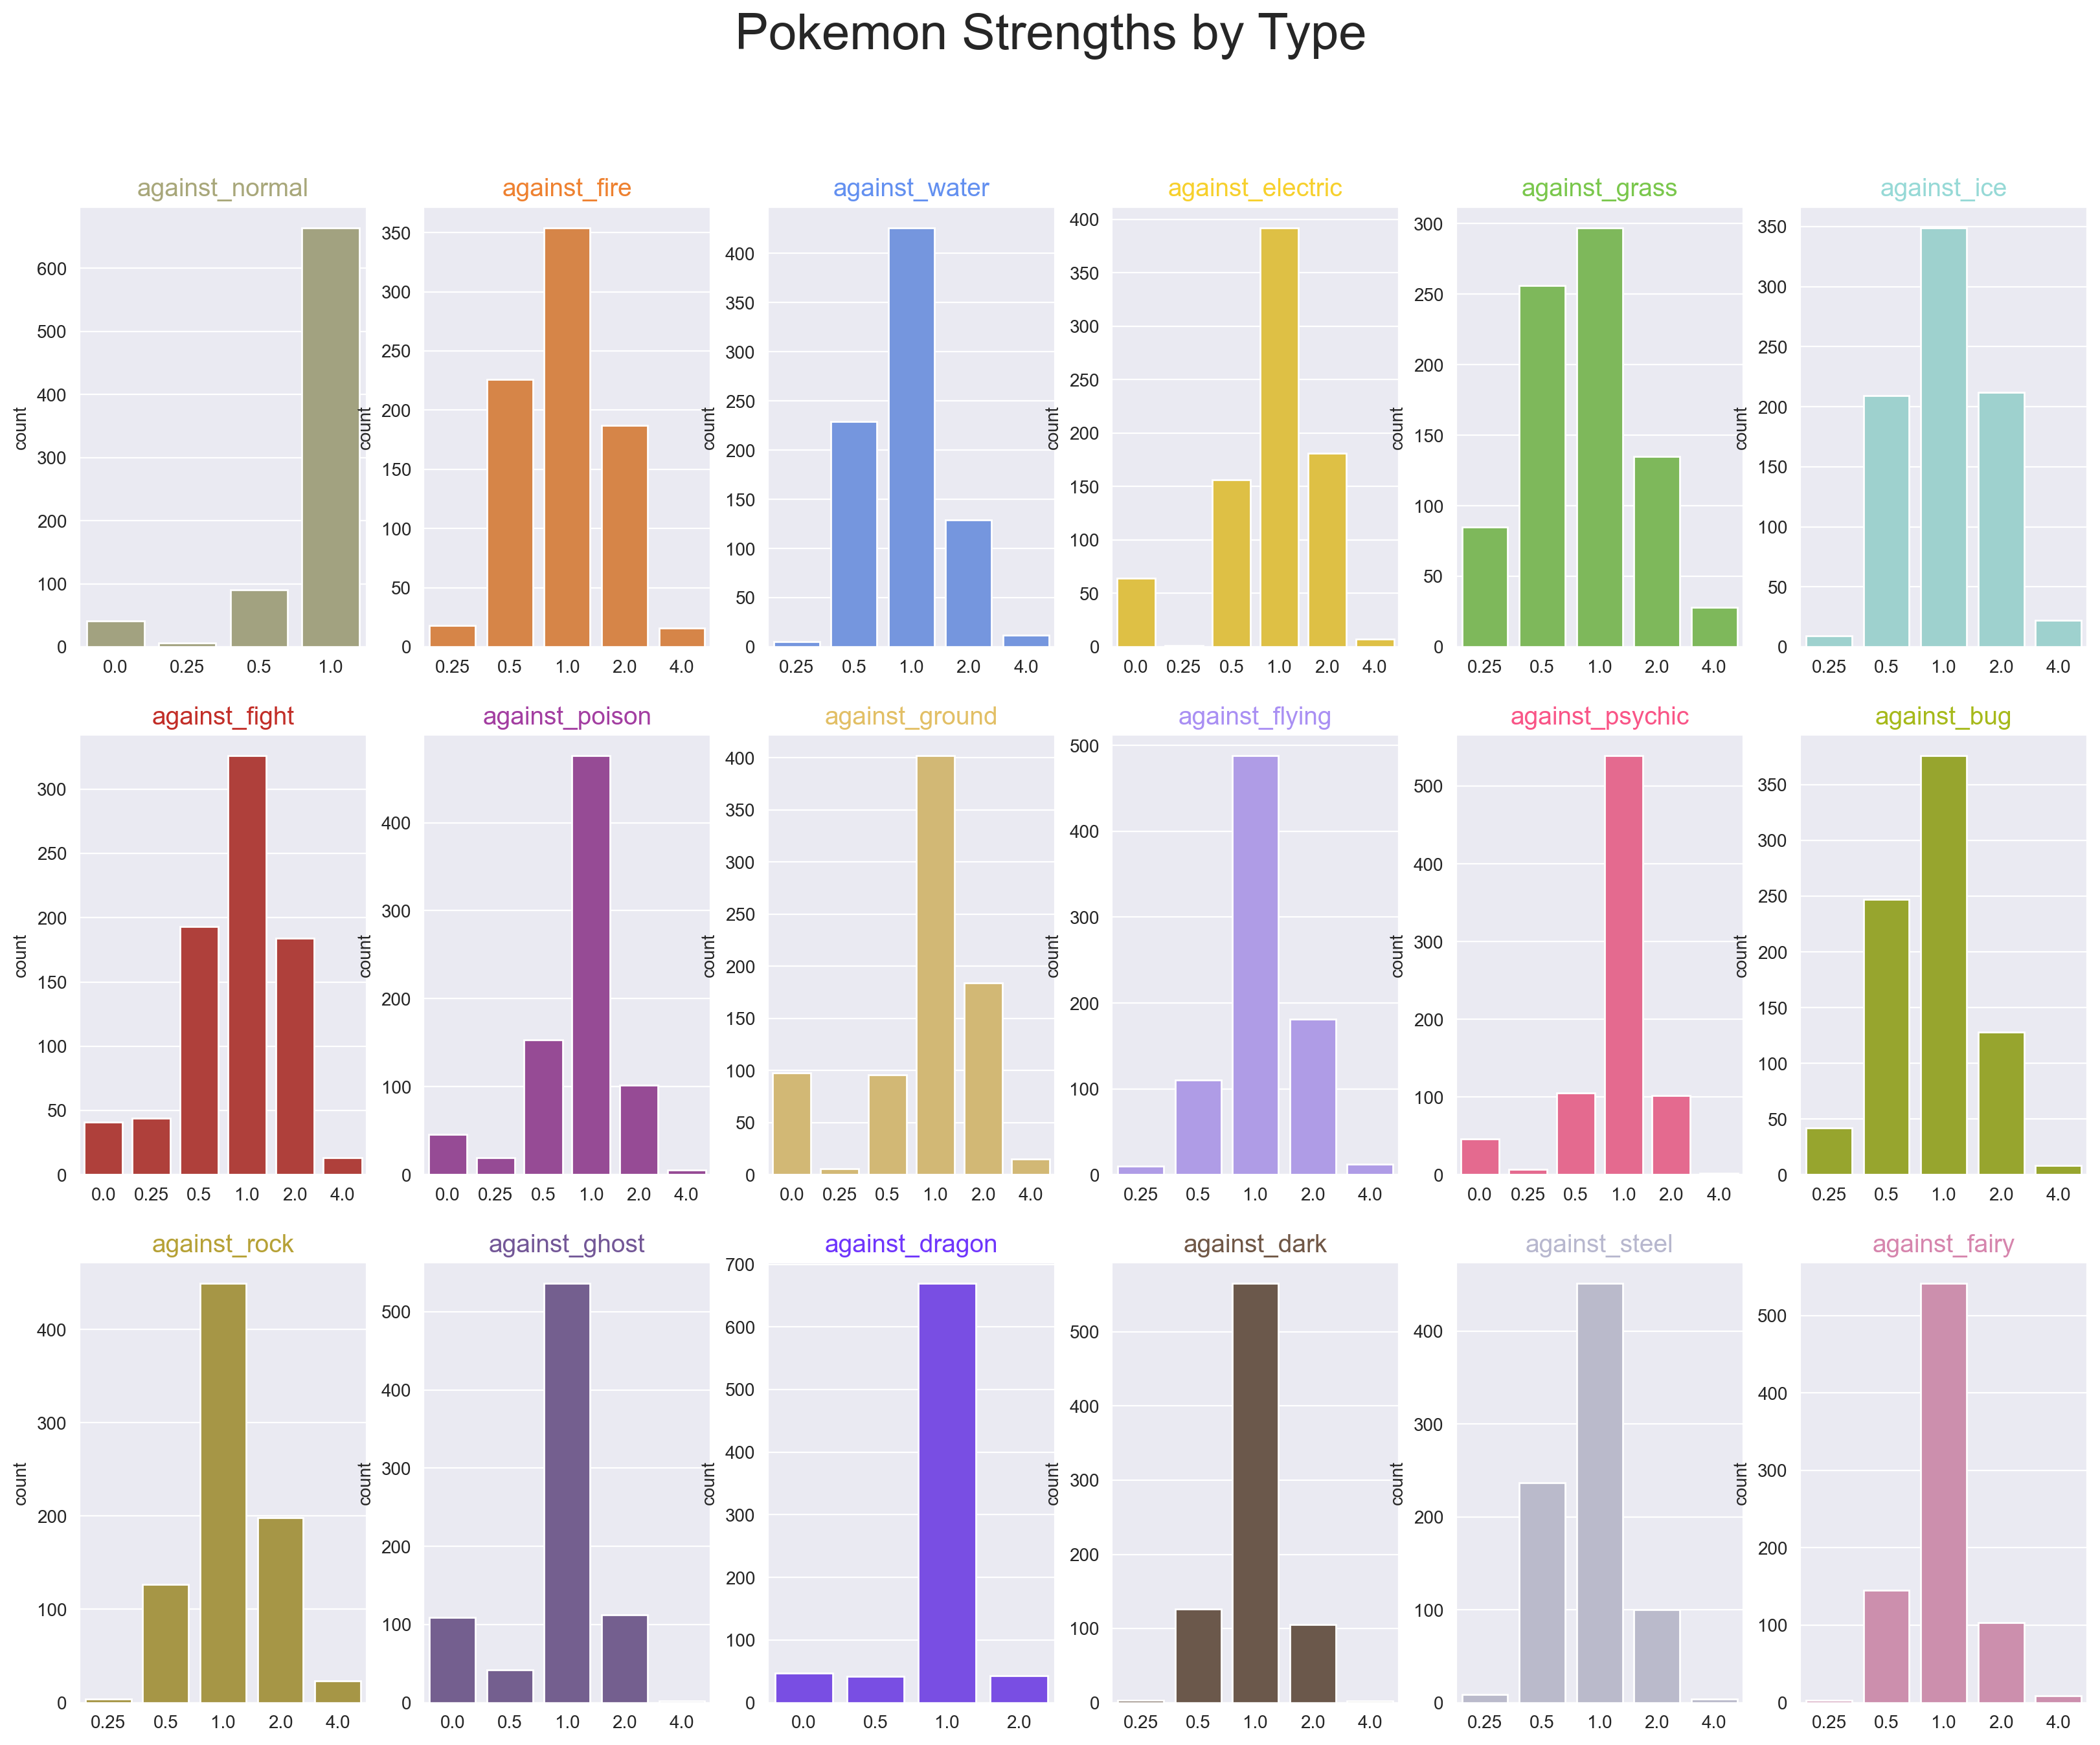

In [14]:
import math

against_columns = ['against_normal',
                   'against_fire',
                   'against_water',
                   'against_electric', 
                   'against_grass',
                   'against_ice', 
                   'against_fight', 
                   'against_poison',
                   'against_ground', 
                   'against_flying', 
                   'against_psychic',
                   'against_bug',
                   'against_rock',
                   'against_ghost', 
                   'against_dragon',
                   'against_dark', 
                   'against_steel',
                   'against_fairy']

n_col = 6
n_row = math.ceil(len(against_columns)/n_col)

title="Pokemon Strengths by Type"

fig, axes = plt.subplots(n_row,n_col)
fig.suptitle(title,size=28)
fig.set_size_inches(20,15)
fig.set_dpi(200)
for i,v in enumerate(against_columns):
    axis = axes[i//n_col][i%n_col]
    type_color=[i for i in color_dict.values()][i]
    sns.countplot(x=df[v],color=type_color,ax=axis)
    axis.set_title(v,color=type_color,size=14)
    axis.set_xlabel(None)

fig.savefig(f"{plot_folder}/{title}.pdf")

### 2.2.2 - Pokemon stat plots

We will analyse the distribution of the six core Pokemon stats:

- `hp`
- `attack`
- `defense`
- `speed`
- `sp_attack`
- `sp_defense`

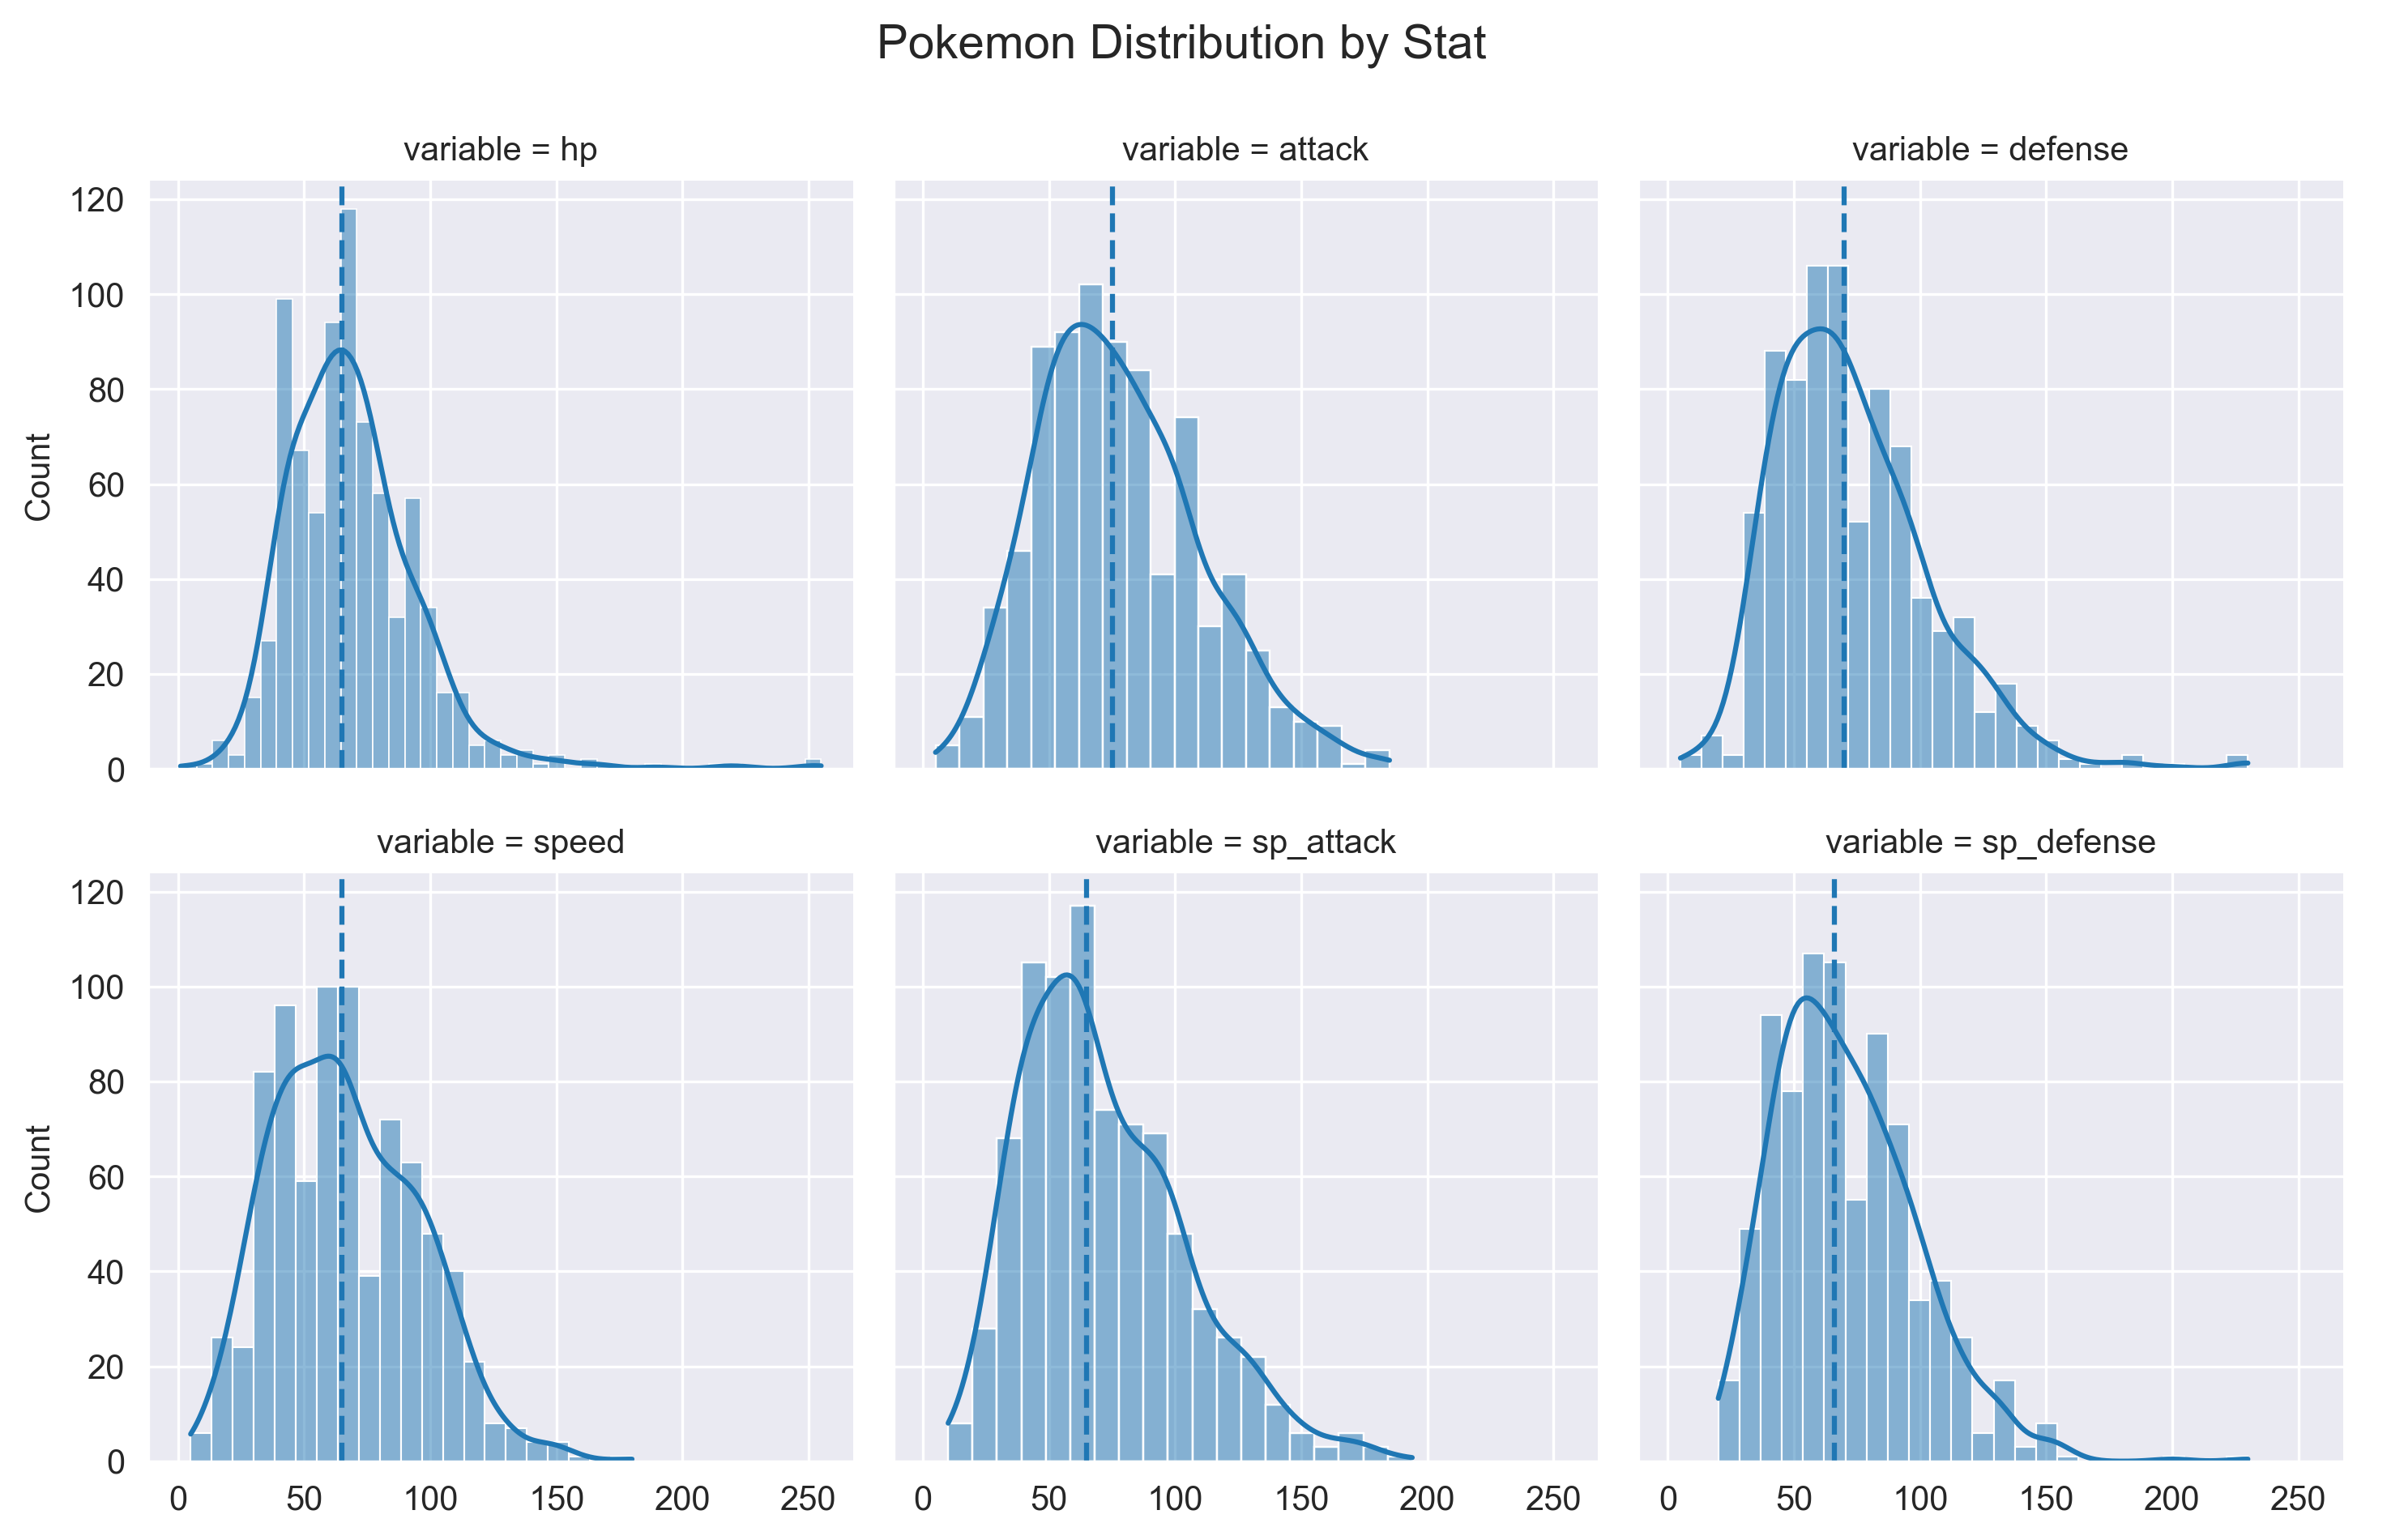

In [15]:
stats=['hp','attack','defense','speed','sp_attack','sp_defense']

g = sns.FacetGrid(df[stats].melt(), col="variable",col_wrap=3)
g.map_dataframe(sns.histplot,kde=True)
g.add_legend()

g.figure.suptitle("Pokemon Distribution by Stat",size=14,y=1.05)
g.figure.set_size_inches(10,6)
g.figure.set_dpi(300)

for index,ax in enumerate(g.axes):
    ax.axvline(df[stats[index]].median(),linestyle='--')

### 2.2.3 - Alolan variants

As alluded to earlier, we have a handfull of Pokemon with Alolan variants. `2.50%` to be exact.

Text(0.5, 0.98, 'has_alolan_variant')

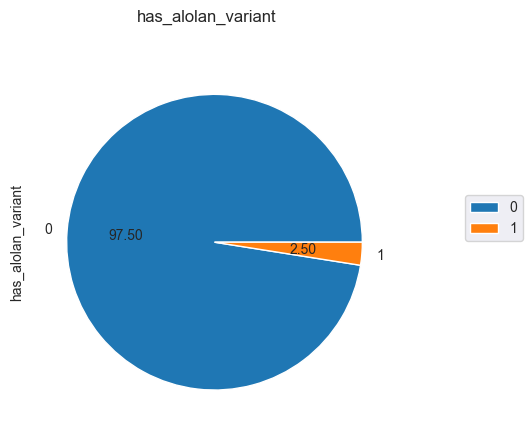

In [16]:
fig,ax=plt.subplots()
df.groupby('has_alolan_variant')['has_alolan_variant'].count().plot.pie(autopct='%.2f',ax=ax)
fig.legend(loc='center right')
fig.suptitle('has_alolan_variant')

### 2.2.4 - Base Happiness

Majority of Pokemon have the same base happiness stat of 70 (83.27%). A major minority have lower base happiness of 35 (8.61%)

Text(0.5, 0.98, 'base_happiness count')

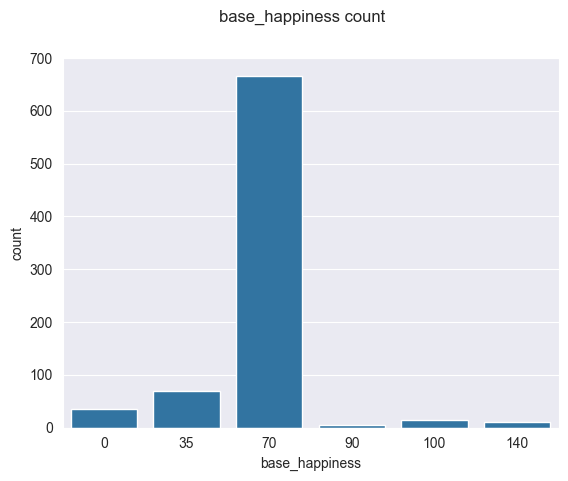

In [17]:
fig,ax=plt.subplots()
sns.countplot(x=df['base_happiness'])
fig.suptitle('base_happiness count')

Text(0.5, 0.98, 'base_happiness breakdown')

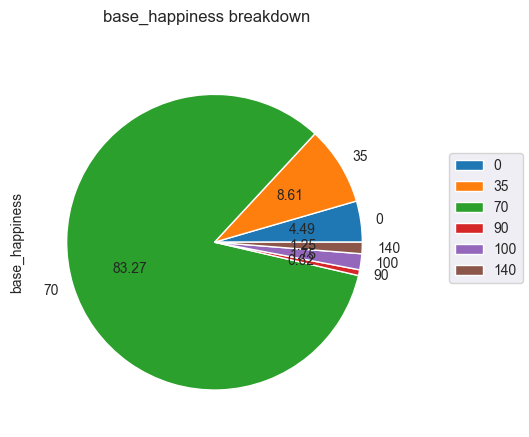

In [18]:
fig,ax=plt.subplots()
df.groupby('base_happiness')['base_happiness'].count().plot.pie(ax=ax,autopct='%.2f')
fig.legend(loc='center right')
fig.suptitle('base_happiness breakdown')

### 2.2.5 - Base Egg Steps

Majority of pokemon have a base egg step of 5120 (54.43%), with 3840 as a major minority (17.48%)

Text(0.5, 0.98, 'base_egg_steps count')

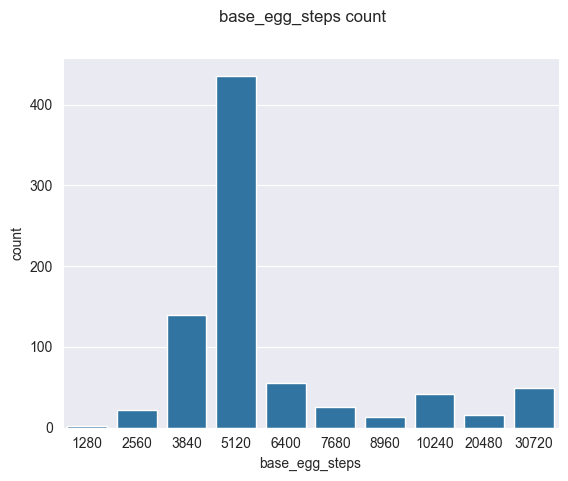

In [19]:
fig,ax=plt.subplots()
sns.countplot(x=df['base_egg_steps'])
fig.suptitle('base_egg_steps count')

Text(0.5, 0.98, 'base_egg_steps breakdown')

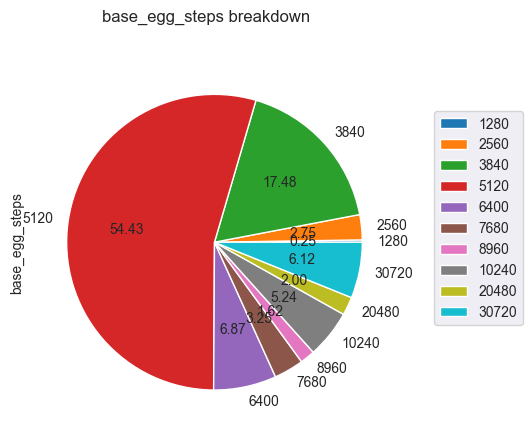

In [20]:
fig,ax=plt.subplots()
df.groupby('base_egg_steps')['base_egg_steps'].count().plot.pie(ax=ax,autopct='%.2f')
fig.legend(loc='center right')
fig.suptitle('base_egg_steps breakdown')

### 2.2.6 - Experience Growth

Text(0.5, 0.98, 'experience_growth count')

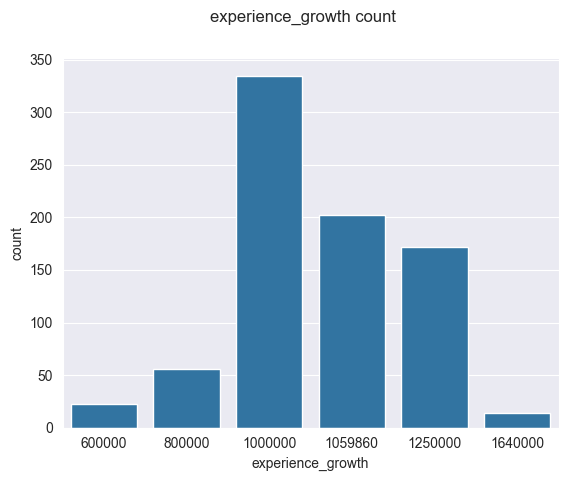

In [21]:
fig,ax=plt.subplots()
sns.countplot(x=df['experience_growth'])
fig.suptitle('experience_growth count')

Text(0.5, 0.98, 'experience_growth breakdown')

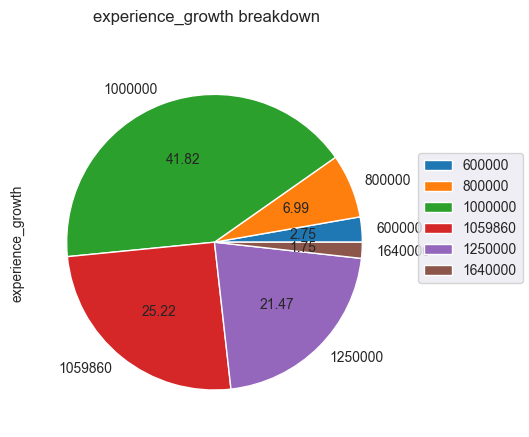

In [22]:
fig,ax=plt.subplots()
df.groupby('experience_growth')['experience_growth'].count().plot.pie(ax=ax,autopct='%.2f')
fig.legend(loc='center right')
fig.suptitle('experience_growth breakdown')

### 2.2.7 - Base Total

We note that the distribution of base total is bi-modal (two peaks), which suggests that there might be some factor that explains the difference in distribution.

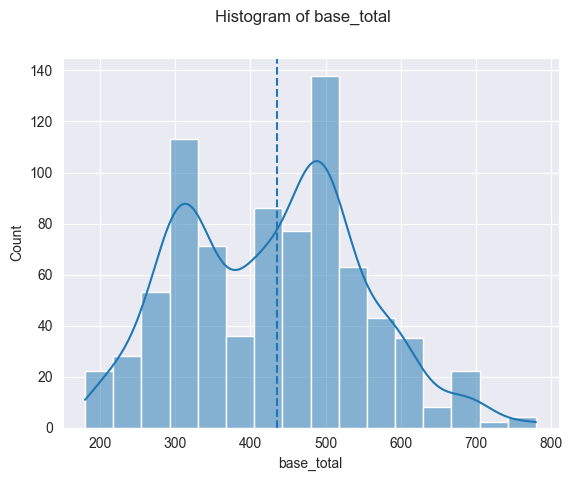

In [23]:
fig,ax=plt.subplots()
sns.histplot(x=df['base_total'],kde=True)
fig.suptitle('Histogram of base_total')
ax.set_xlabel('base_total')
ax.axvline(df['base_total'].median(),linestyle='--')

### 2.2.8 - type1 Count

The mode for `type1` is `water`, meaning there are more types of Pokemon whose main type is water than others.

/var/folders/b4/f6jphwwx4lj4whxxq7x_d3_00000gn/T/ipykernel_92650/1099476364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['type1'],palette=color_dict)
/var/folders/b4/f6jphwwx4lj4whxxq7x_d3_00000gn/T/ipykernel_92650/1099476364.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=labels,rotation=90)


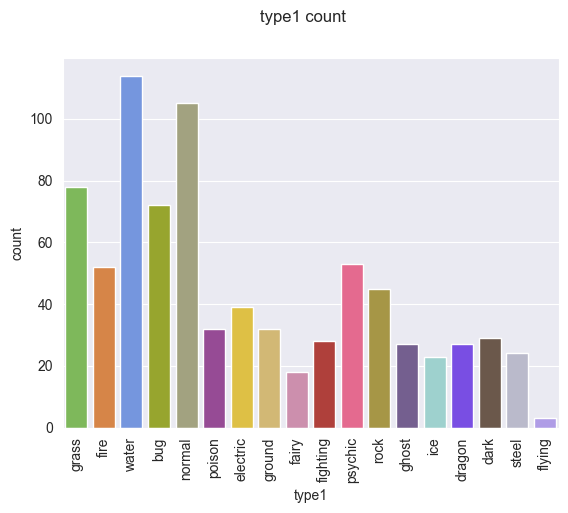

In [24]:
fig,ax=plt.subplots()
sns.countplot(x=df['type1'],palette=color_dict)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels=labels,rotation=90)
fig.suptitle('type1 count')
fig.set_dpi(100)

---

# Section 3 - Multivariate Analysis

Now we really get really cooking. In this section we analyze how variables relate with other data. The easiest way to start is with sns.pairplot() which plots scatter plots of every combination of numerical data in a dataset.

There are a large number of numerical variables even after dropping the against columns, hence it will take awhile to render the plots. The output will be saved to the folder specified in the pre-amble.

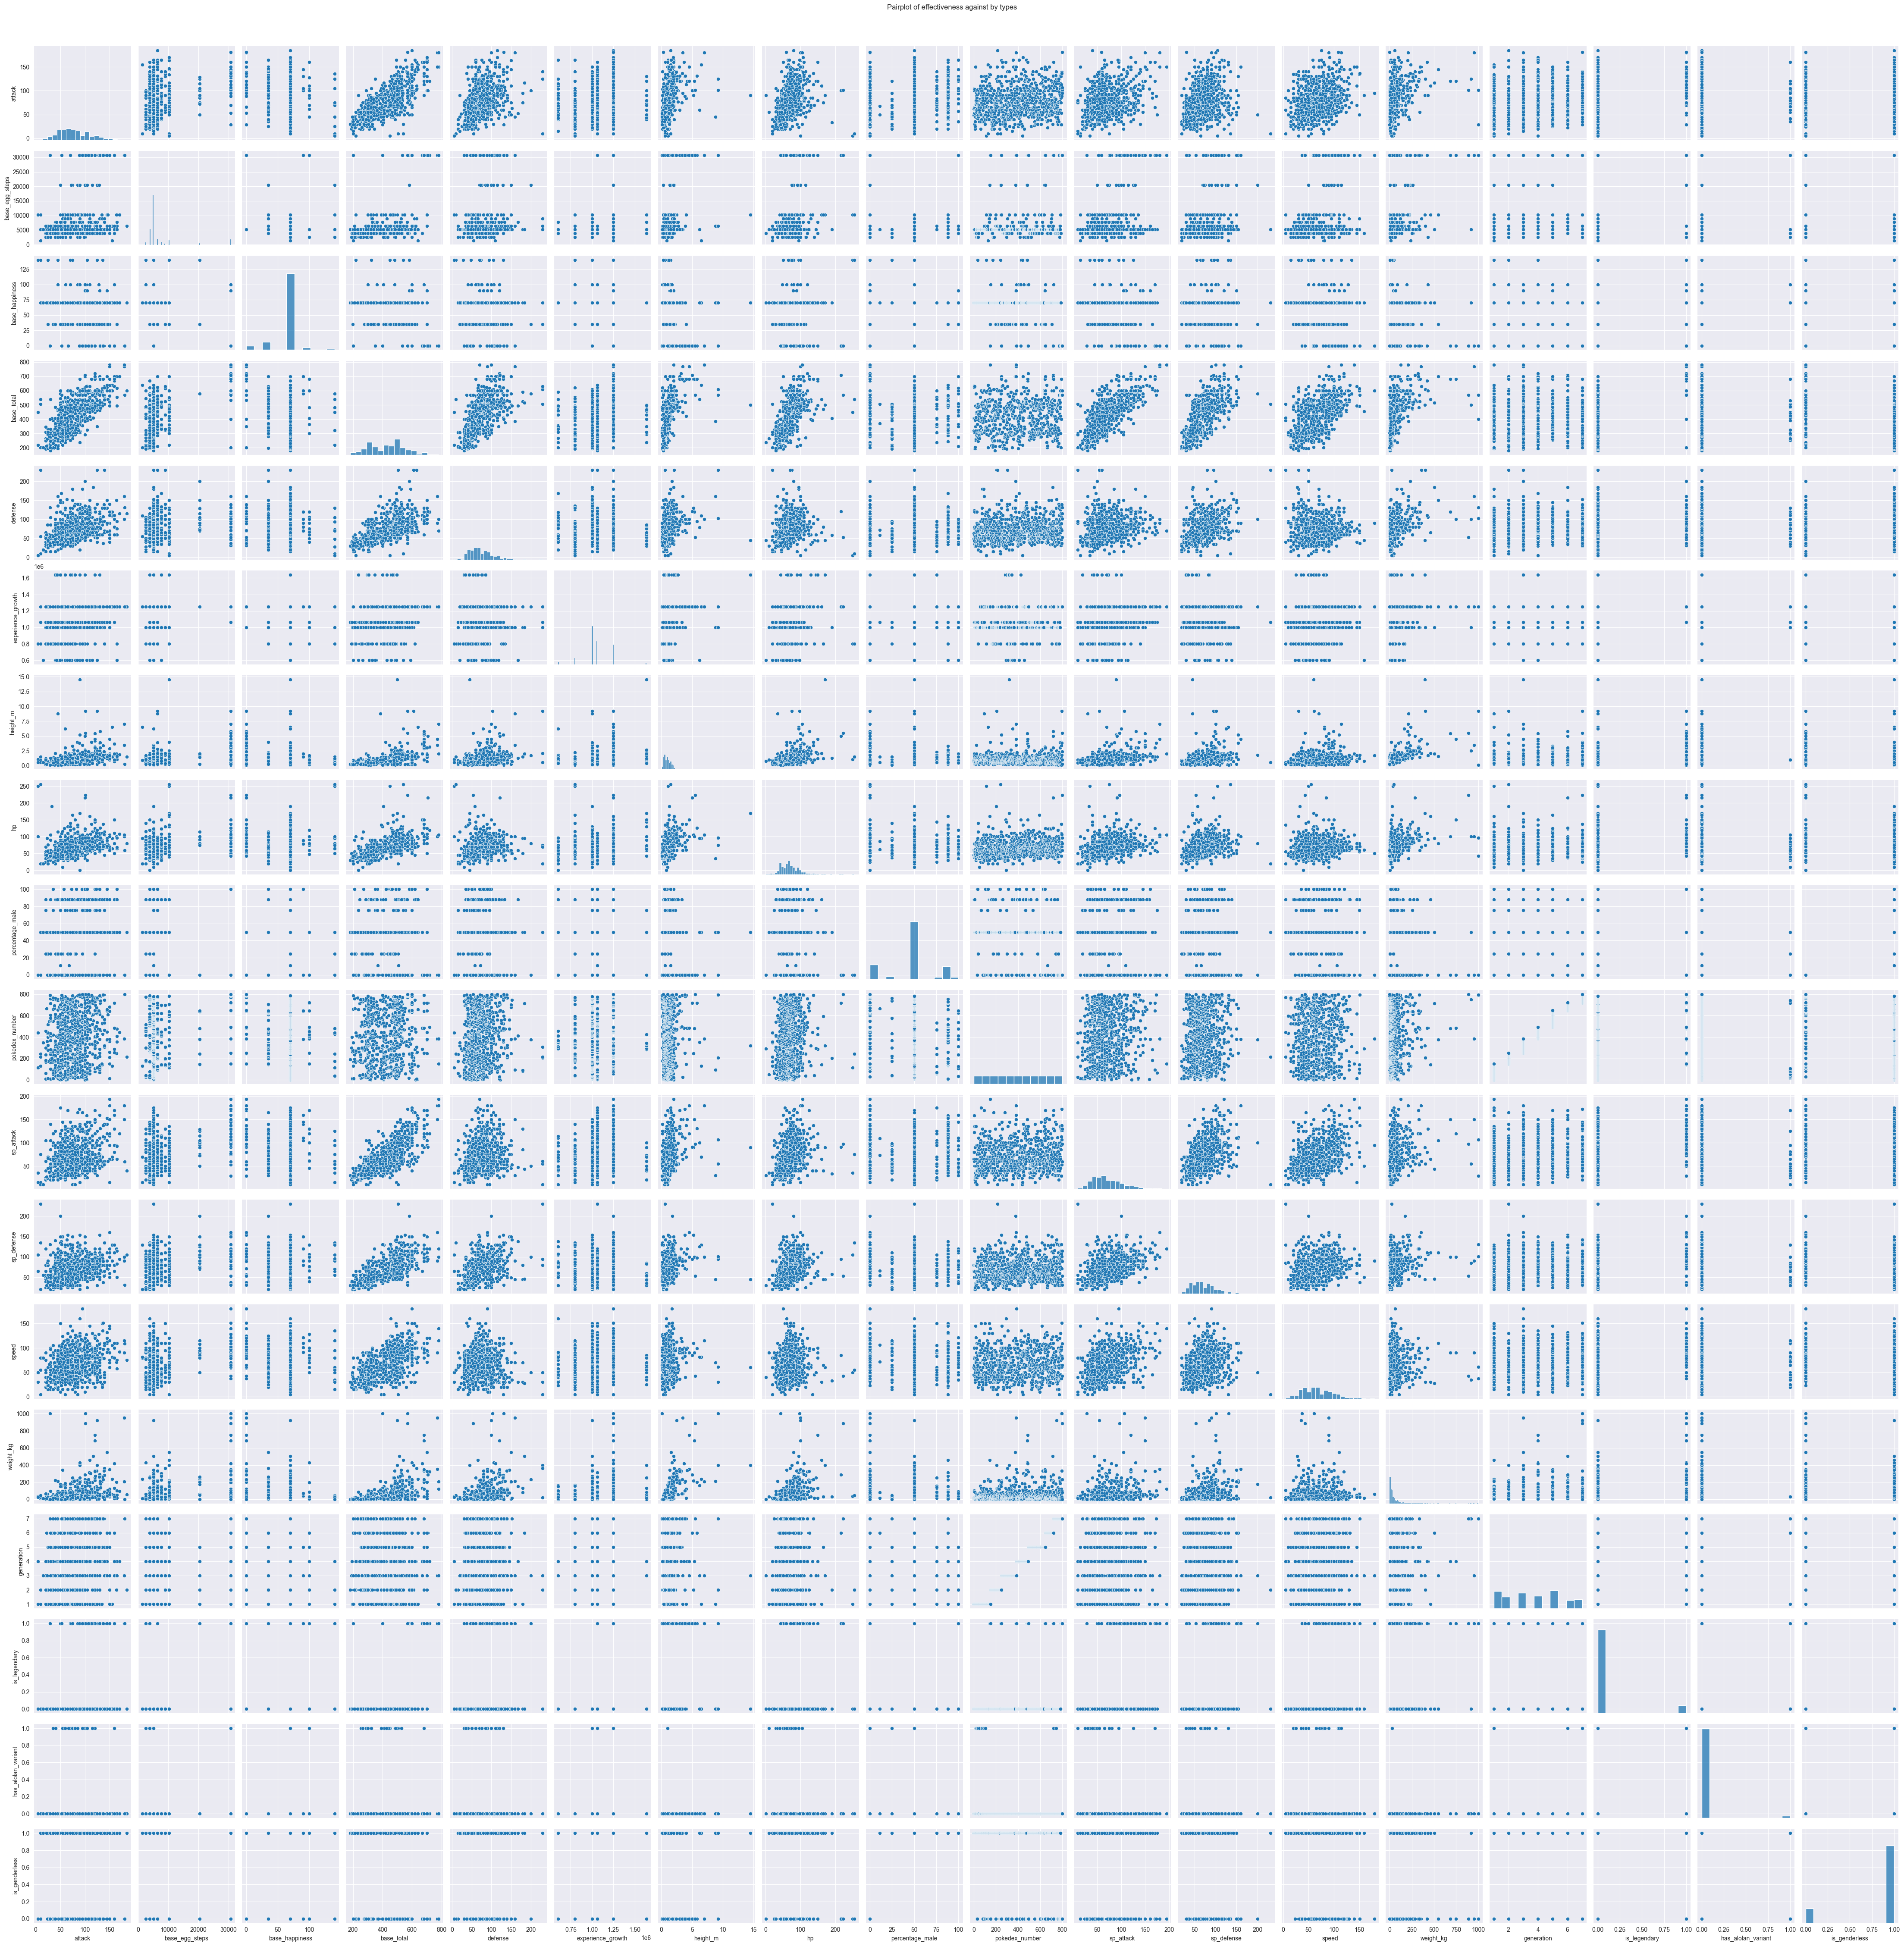

In [25]:
title = 'Pairplot of effectiveness against by types'
g=sns.pairplot(df.drop(columns=against_columns))
# g.map(lambda x, **kws: plt.axvline(x.median(),ls='--'),'value')
# g.map(lambda x, **kws: plt.axhline(x.median(),ls='--'),'value')
g.figure.suptitle(title,y=1.01)
g.figure.set_dpi(100)
g.figure.savefig(f"{title}.pdf")

## 3.1 Correlation Analysis

`pandas` can give quick correlation values, and these can be fed into seaborn's `heatmap` function to generate a heatmap.

From the below we can see that: 

- `base_egg_steps` has high correlation with `is_legendary`. Legendary Pokemon require more steps to hatch.
- `is_legendary` seems to have some explanatory power on `base_total`. Legendary Pokemon should have higher base stats.

It is pertinent to note that using simple correlation on categorical variables is not an appropriate statistical.methodology

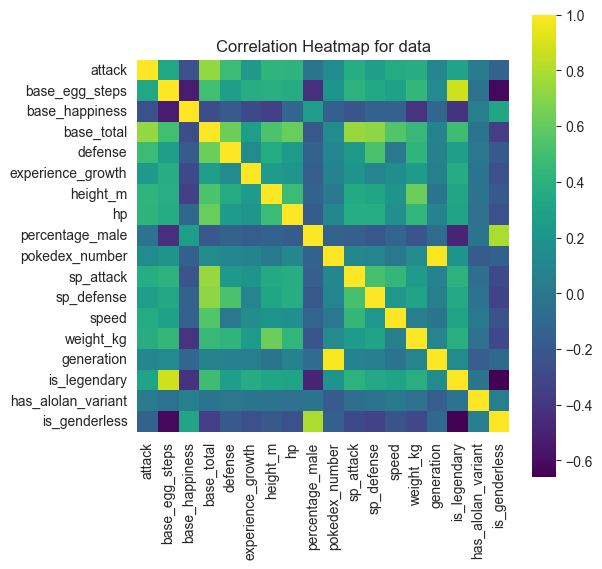

In [26]:
title='Correlation Heatmap for data'
fig,ax=plt.subplots()
sns.heatmap(df.drop(columns=against_columns).corr(numeric_only=True),ax=ax,cmap='viridis')
ax.set_title(title)
ax.set_aspect('equal')
fig.set_size_inches(6,6)
fig.set_dpi(100)
fig.savefig(f"{plot_folder}/{title}.pdf")

## 3.2 - How do legendary Pokemon base stats differ...

We dedicate a section to legendary Pokemon analysis.

### 3.2.1 - ...by Generation?

We have the following findings:

- Given a legendary pokemon, it is very likely base_total will be higher than a non-legendary.
- Given a legendary pokemon, Generation 4 is the strongest. (Arceus)

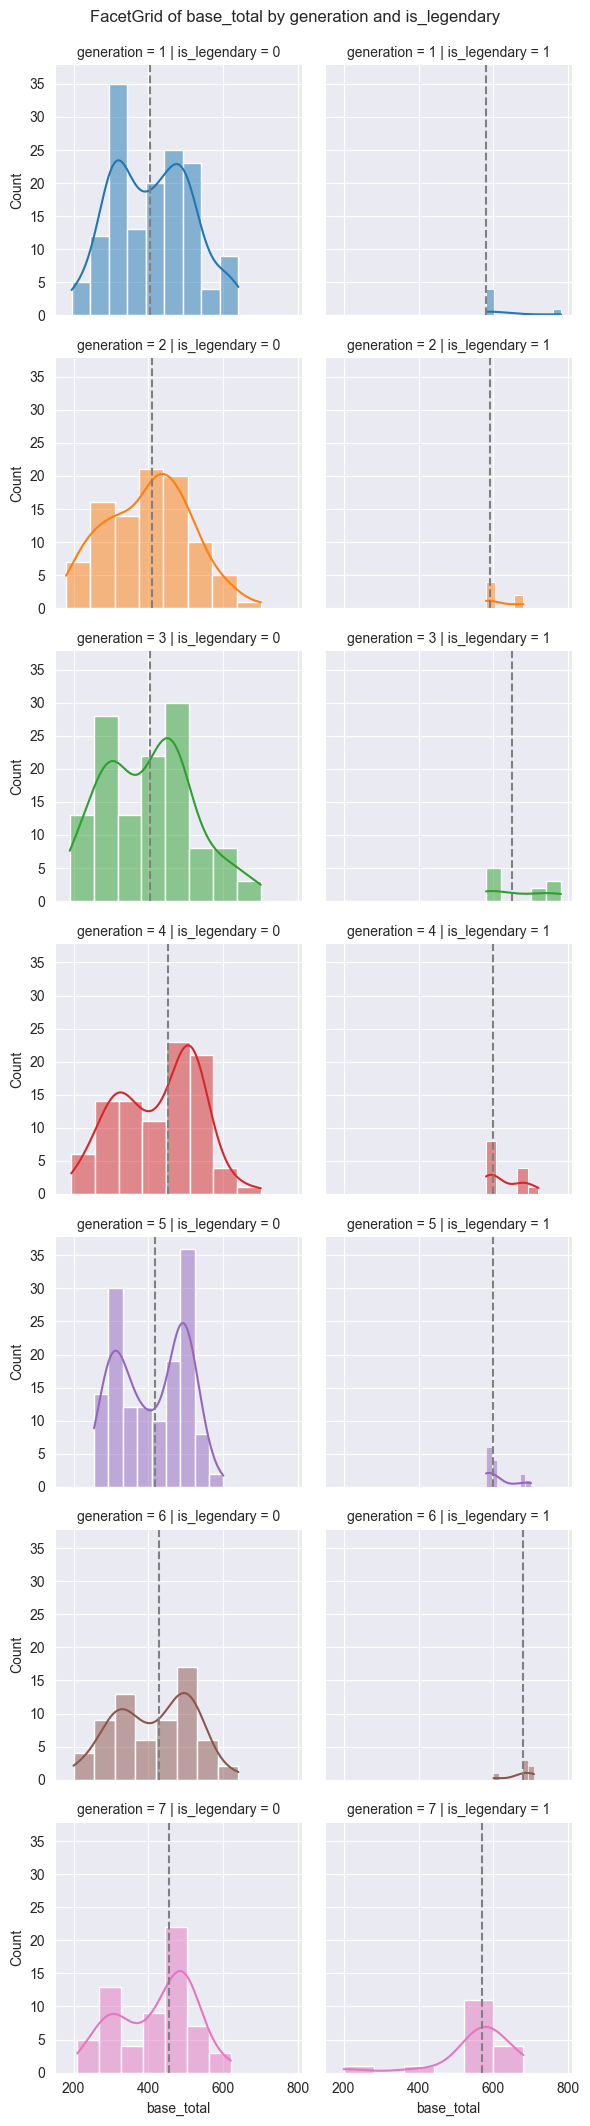

In [27]:
title='FacetGrid of base_total by generation and is_legendary'
g= sns.FacetGrid(df,row='generation',col='is_legendary',hue='generation')
g.map_dataframe(sns.histplot, 'base_total',kde=True)
g.map(lambda x, **kws: plt.axvline(x.median(),ls='--',color='gray'),'base_total')
g.figure.suptitle(title,y=1.01)
g.figure.set_dpi(100)
g.savefig(f"{plot_folder}/{title}.pdf")

### 3.2.2 - ...by Type1?

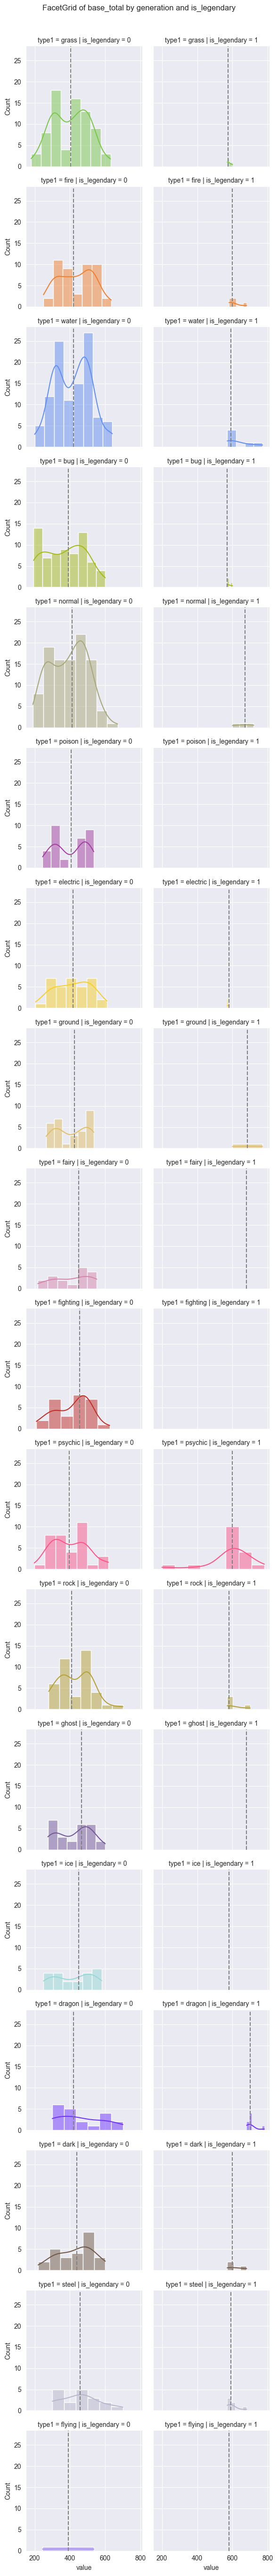

In [28]:
title='FacetGrid of base_total by generation and is_legendary'
g=sns.FacetGrid(df.melt(id_vars=['type1','is_legendary'],value_vars='base_total'),row='type1',col='is_legendary',hue='type1',palette=color_dict)
g.map(sns.histplot,'value',kde=True)
g.map(lambda x, **kws: plt.axvline(x.median(),ls='--',color='gray'),'value')
g.figure.suptitle(title,y=1.01)
g.figure.set_dpi(100)
g.savefig(f"{plot_folder}/{title}.pdf")

## 3.3 - Analysis by Types

### 3.3.1 - Base Total

In [29]:
title='FacetGrid of base_total by type1 and type2'
g=sns.FacetGrid(df.melt(id_vars=['type1','type2'],value_vars='base_total'),row='type1',col='type2',hue='type1',palette=color_dict)
g.map(sns.histplot,'value',kde=True)
g.figure.suptitle(title,y=1.01)
g.figure.set_dpi(200)
g.savefig(f"{plot_folder}/{title}.pdf")

The above is unwieldy and takes a long time to run. We will do a simple heatmap for the median value of `base_total` by type to get a sense of which combinations tend to be more powerful.

We can see the following combos are strong:

1. Any Dragon hybrid tends to be colored darker, meaning it is stronger than a pure Dragon type.
2. Fighting and Steel (Lucario?)
3. Psychic/Ghost
4. Psychic/Fighting
5. Psychic/Steel (Metagross?)

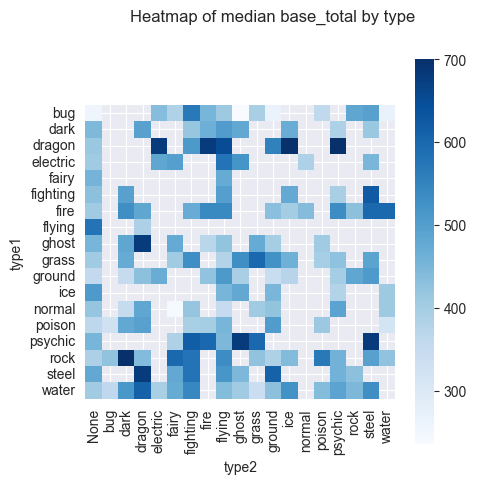

In [30]:
title="Heatmap of median base_total by type"
fig,ax=plt.subplots()
sns.heatmap(df.melt(id_vars=['type1','type2'],value_vars='base_total').pivot_table(values='value',index='type1',columns='type2',aggfunc='median'),ax=ax,cmap='Blues')
fig.suptitle(title)
ax.set_aspect('equal')
fig.set_dpi(100)
fig.set_size_inches(5,5)
fig.savefig(f"{plot_folder}/{title}.pdf")

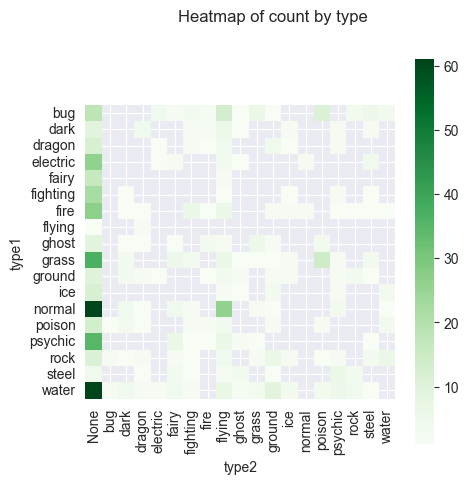

In [31]:
fig,ax=plt.subplots()
sns.heatmap(df.melt(id_vars=['type1','type2'],value_vars='base_total').pivot_table(values='value',index='type1',columns='type2',aggfunc='count'),ax=ax,cmap='Greens')
fig.suptitle('Heatmap of count by type')
ax.set_aspect('equal')
fig.set_dpi(100)
fig.set_size_inches(5,5)

### 3.3.2 Specific stats

From the heatmap of median stats by type1 below, given a random Pokemon has a particular type1:

- A median Flying type1 pokemon would lead the pack in terms of speed
- A median Steel type1 pokemon would be the most defensive
- A median Fighting pokemon would have the strongest attack
- A median Psychic pokemon would have the strongest sp_attack

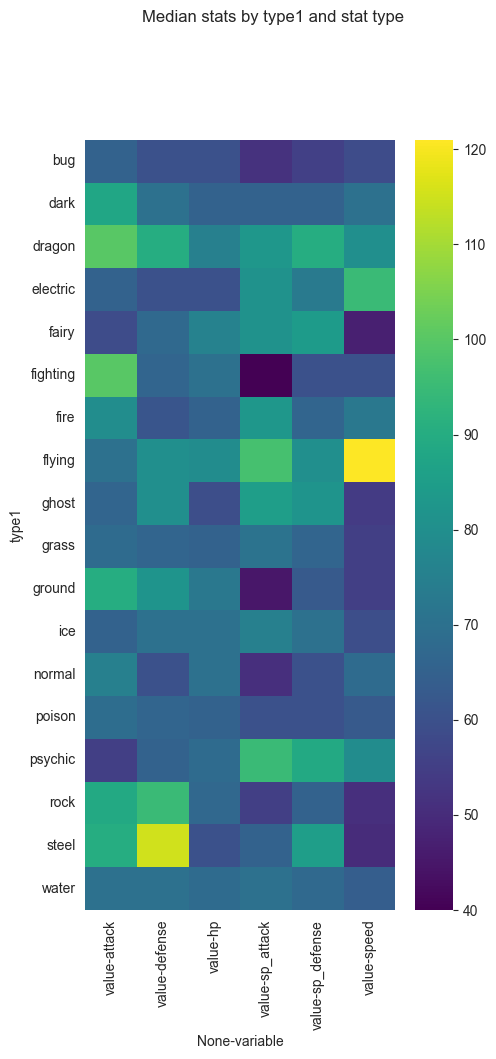

In [32]:
title='Median stats by type1 and stat type'
fig,ax=plt.subplots()
sns.heatmap(df[stats+['type1']].melt(id_vars='type1').pivot_table(index='type1',columns='variable',aggfunc='median'),ax=ax,cmap='viridis')
fig.set_dpi(100)
fig.set_size_inches(5,10)
fig.suptitle(title,y=1.01)
fig.savefig(f"{plot_folder}/{title}.pdf")

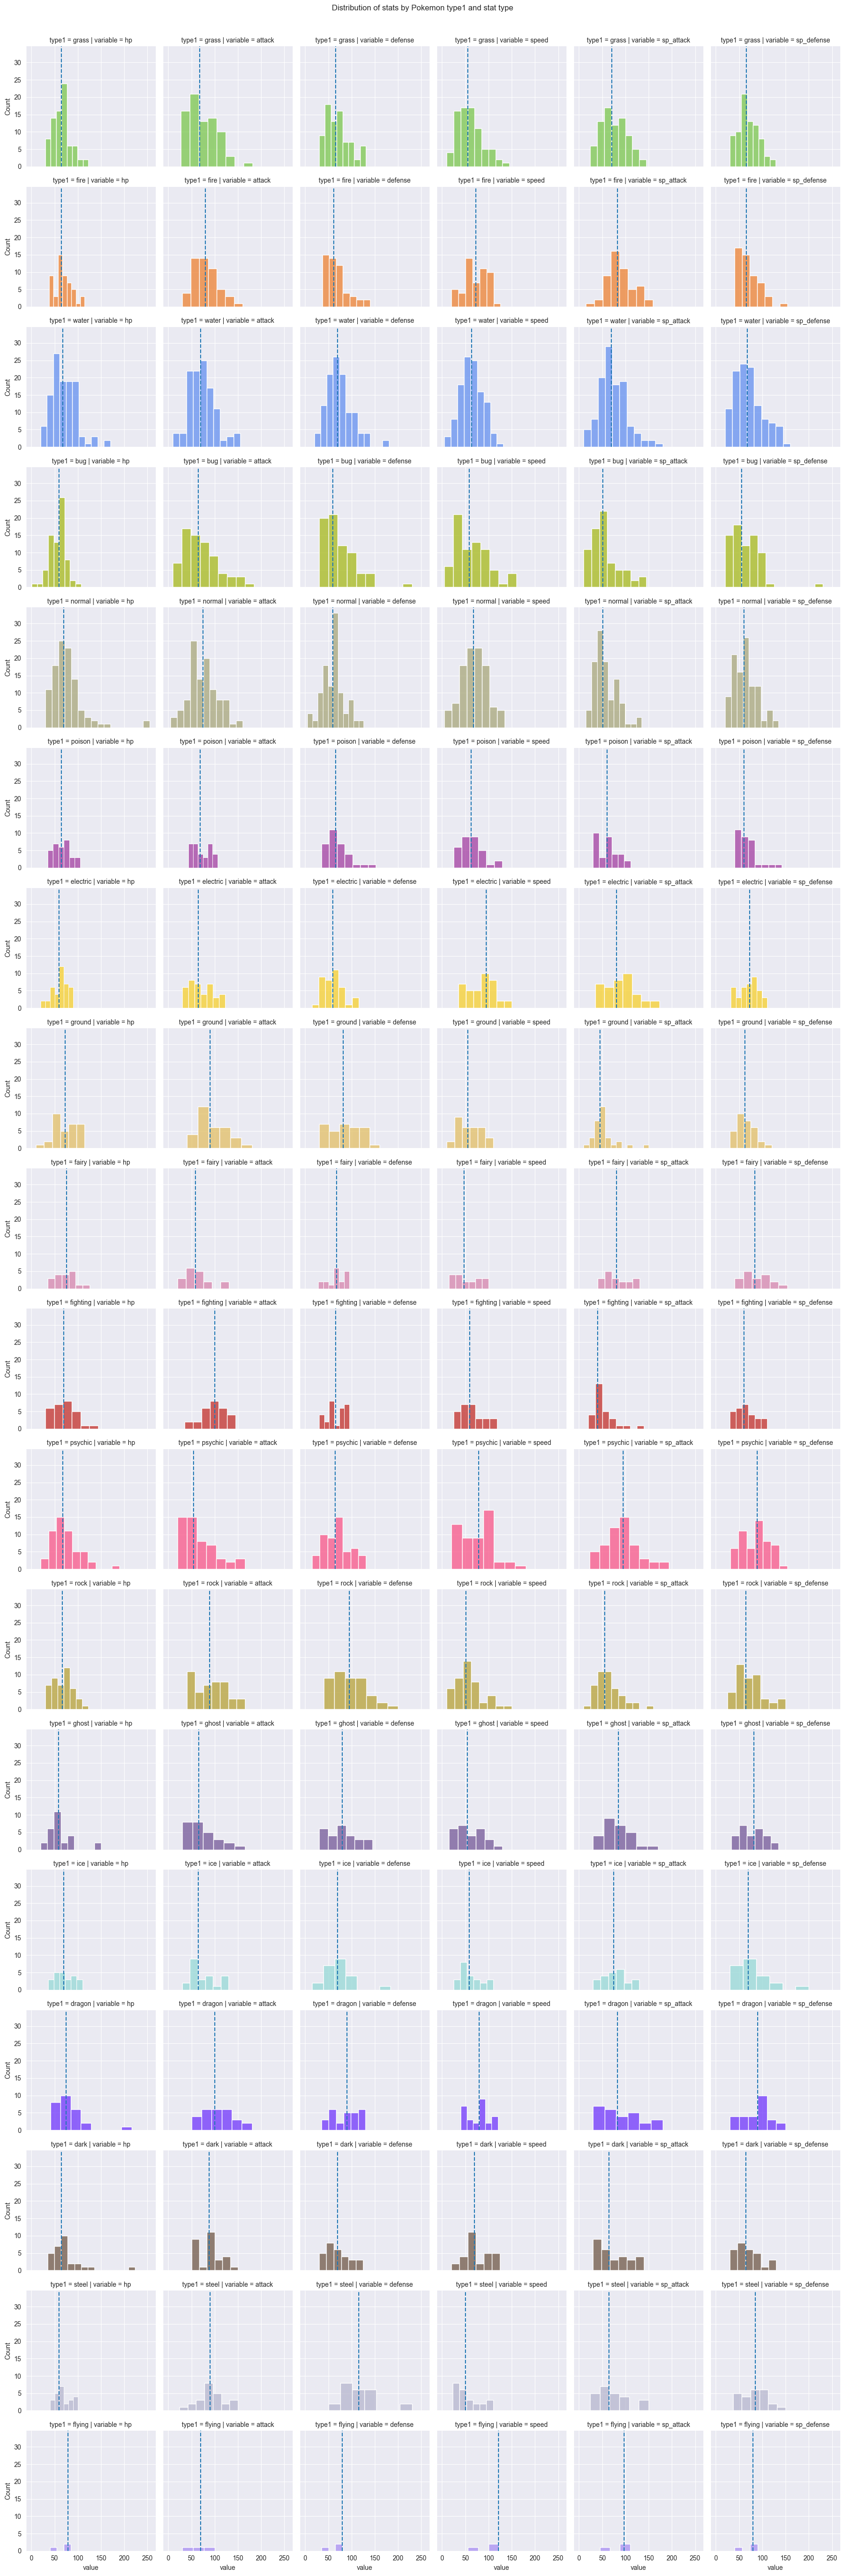

In [33]:
title = 'Distribution of stats by Pokemon type1 and stat type'
g= sns.FacetGrid(df[stats+['type1']].melt(id_vars='type1'),col='variable',row='type1',hue='type1',palette=color_dict)
g.map(sns.histplot,'value')
g.map(lambda x, **kws: plt.axvline(x.median(),ls='--'),'value')
g.figure.suptitle(title,y=1.01)
g.figure.set_dpi(100)
g.figure.savefig(f"{title}.pdf")

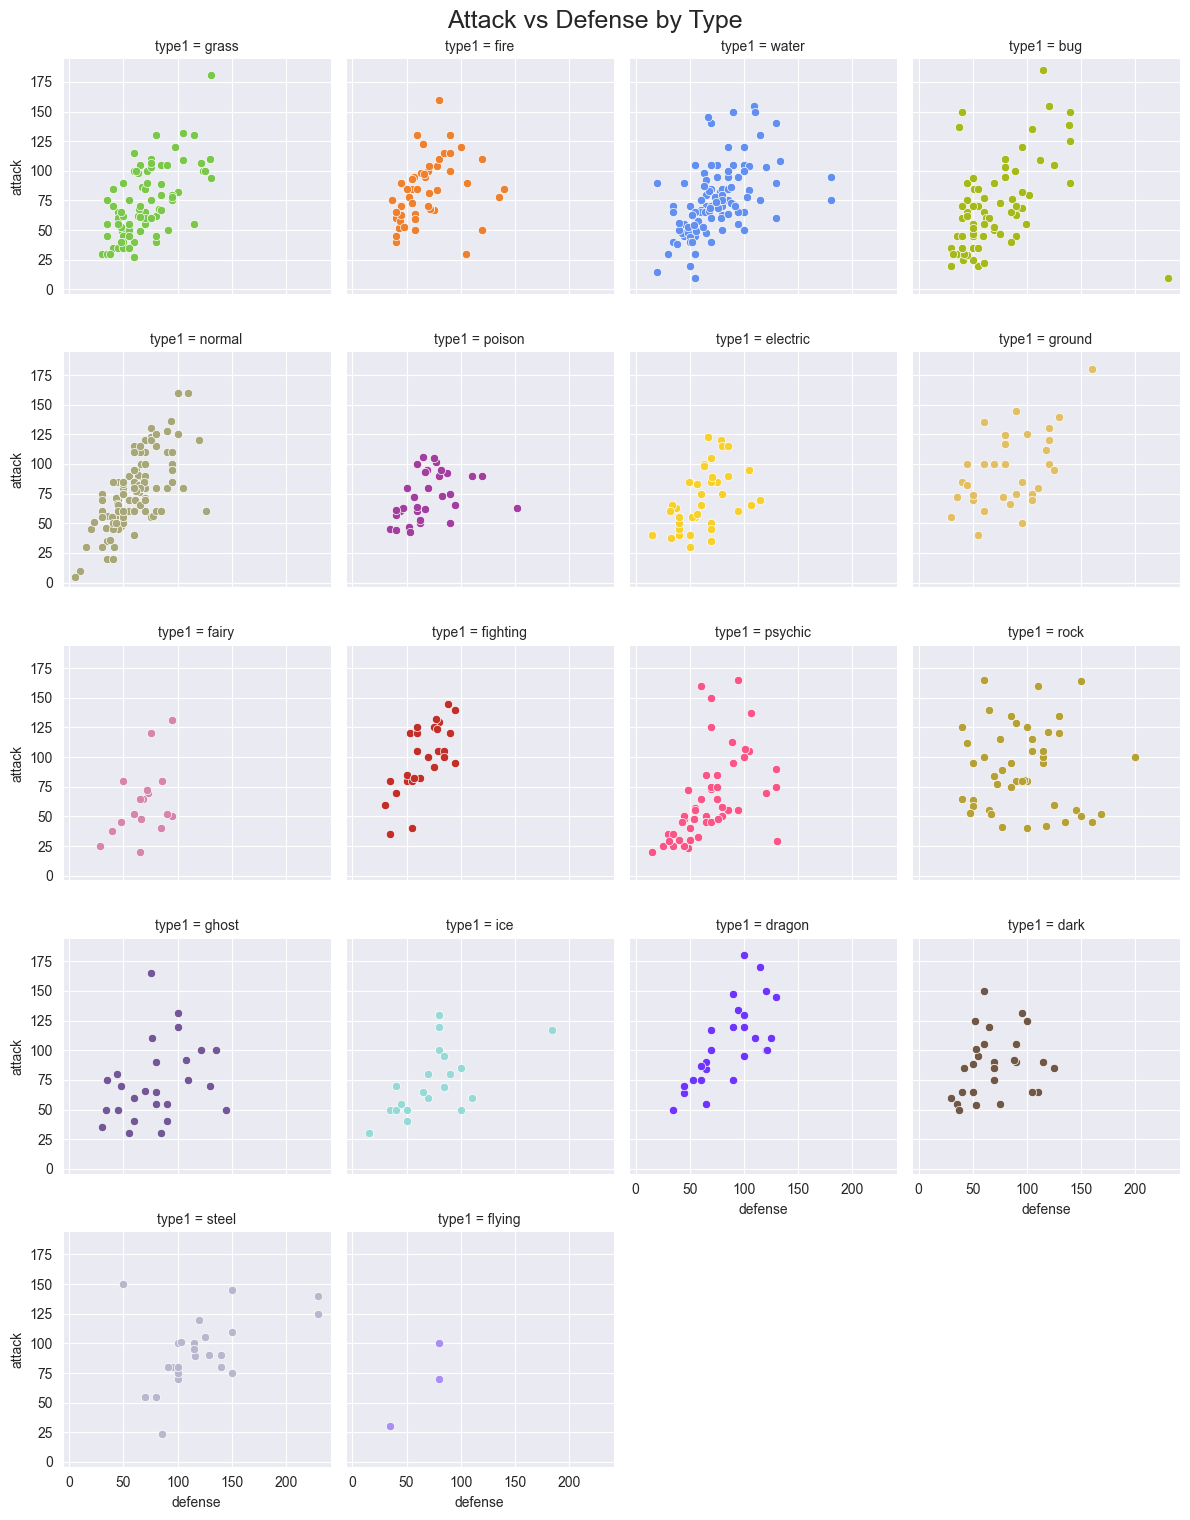

In [34]:
title = 'Attack vs Defense by Type'
g= sns.FacetGrid(df,col='type1',hue='type1',palette=color_dict,col_wrap=4)
g.map(sns.scatterplot,'defense','attack')
g.figure.suptitle(title,size=18,y=1.01)
g.figure.set_dpi(100)
g.savefig(f"{plot_folder}/{title}.pdf")

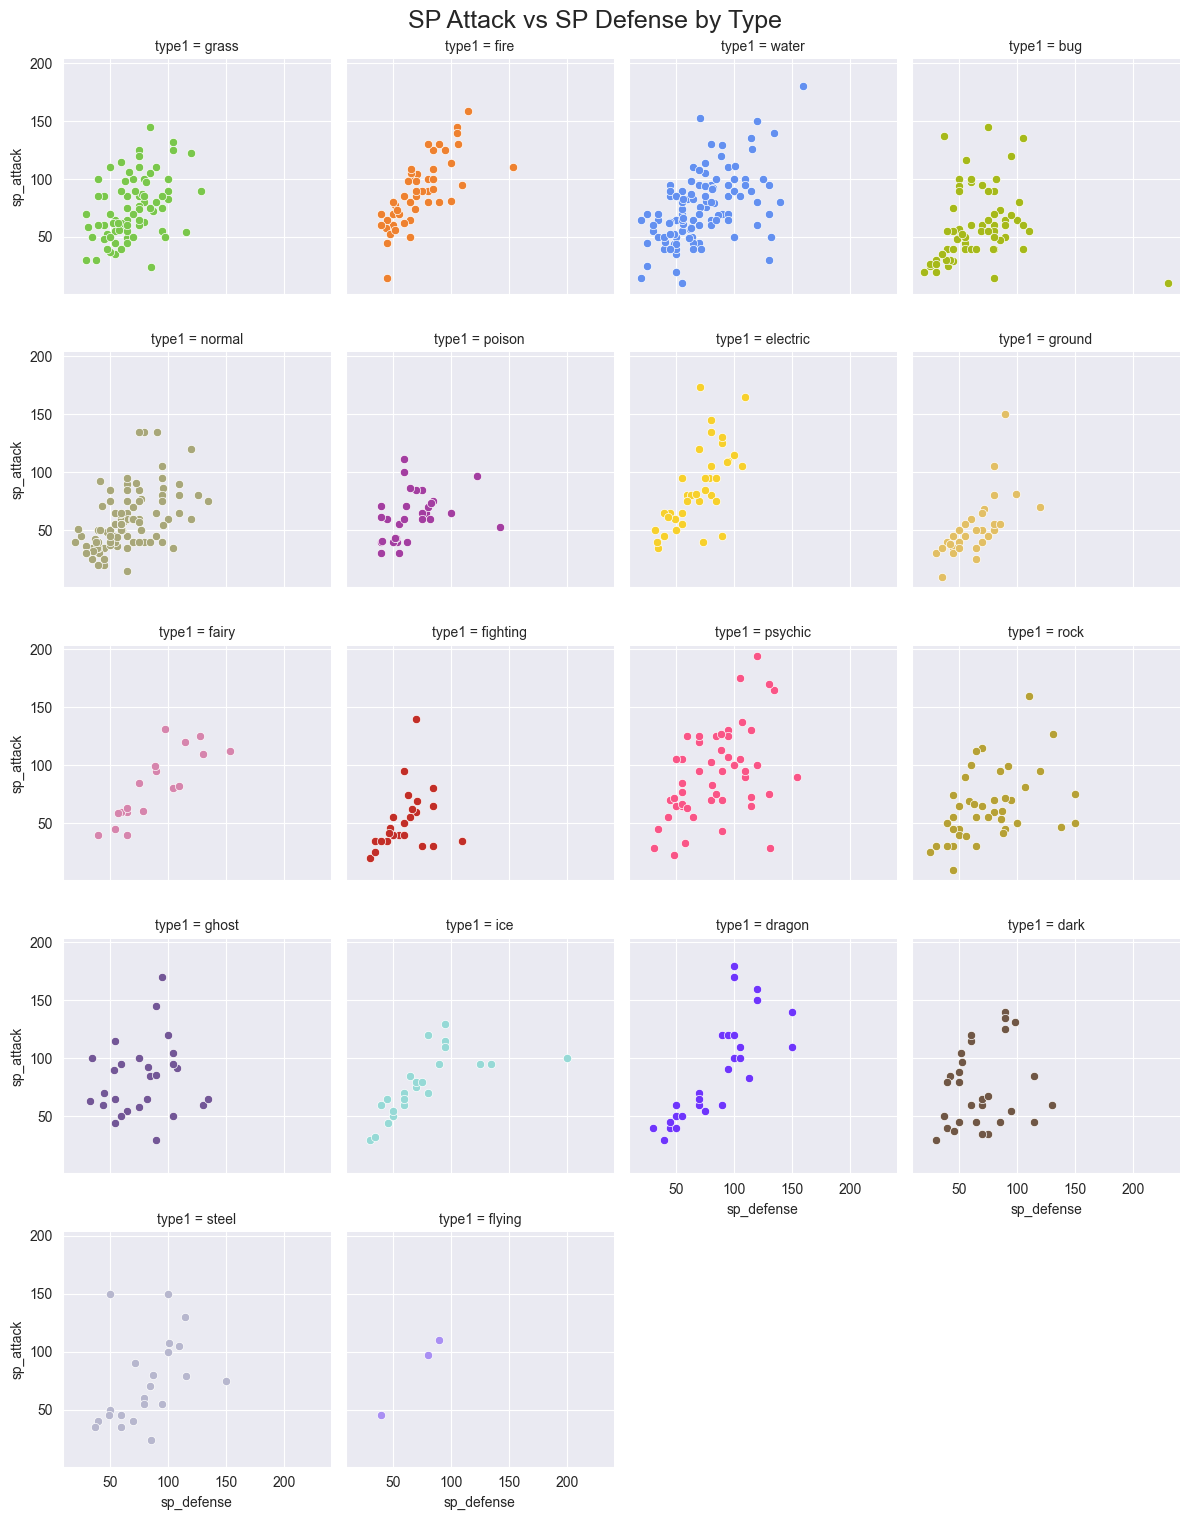

In [35]:
title = 'SP Attack vs SP Defense by Type'
g= sns.FacetGrid(df,col='type1',hue='type1',palette=color_dict,col_wrap=4)
g.map(sns.scatterplot,'sp_defense','sp_attack')
g.figure.suptitle(title,size=18,y=1.01)
g.figure.set_dpi(100)
g.savefig(f"{plot_folder}/{title}.pdf")

/var/folders/b4/f6jphwwx4lj4whxxq7x_d3_00000gn/T/ipykernel_92650/4203048321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='hp',x='type1',palette=color_dict,ax=ax)
/var/folders/b4/f6jphwwx4lj4whxxq7x_d3_00000gn/T/ipykernel_92650/4203048321.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=labels,rotation=90)


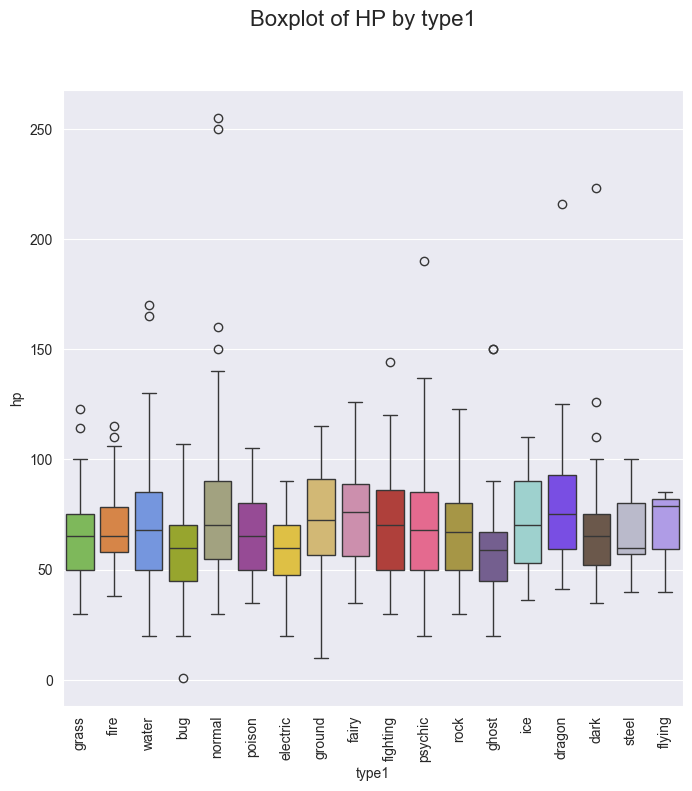

In [36]:
title='Boxplot of HP by type1'
fig, ax = plt.subplots()
sns.boxplot(data=df,y='hp',x='type1',palette=color_dict,ax=ax)
fig.suptitle(title,size=16)
fig.set_dpi(100)
fig.set_size_inches(8,8)
labels=ax.get_xticklabels()
ax.set_xticklabels(labels=labels,rotation=90)
fig.savefig(f"{plot_folder}/{title}.pdf")

## 3.4 - Other stats

The main takeaways are:

- More steps are required to hatch a legendary
- Legendary pokemon are more likely to have lower base_happiness than non-legendary pokemon

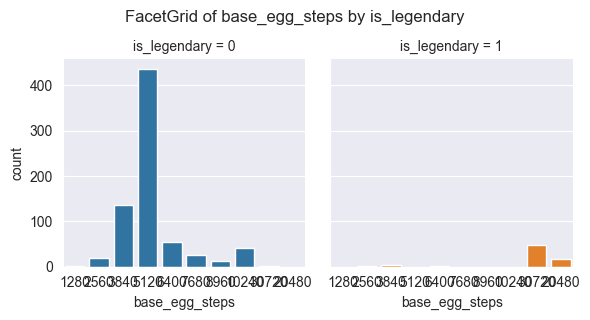

In [37]:
g= sns.FacetGrid(df,col='is_legendary',hue='is_legendary')
g.map_dataframe(sns.countplot, 'base_egg_steps')
g.figure.suptitle('FacetGrid of base_egg_steps by is_legendary',y=1.05)
g.figure.set_dpi(100)

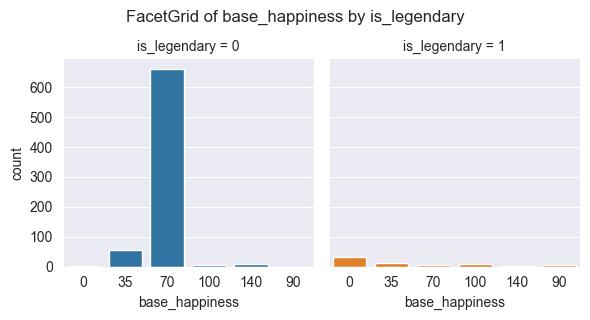

In [38]:
g= sns.FacetGrid(df,col='is_legendary',hue='is_legendary')
g.map_dataframe(sns.countplot, 'base_happiness')
g.figure.suptitle('FacetGrid of base_happiness by is_legendary',y=1.05)
g.figure.set_dpi(100)